In [7]:
import cirq
import qsimcirq
import numpy as np
from qiskit.visualization import plot_histogram
from encoded.dj import dj

In [23]:

noise_p = 0.01
n_shots = 10000
total_qubits = 10


qreg = cirq.LineQubit.range(total_qubits)
circuit, type_, value_ = dj(qreg)
circuit.append(cirq.measure(qreg[:total_qubits-1], key="m"))

c_m = circuit.copy()
if noise_p > 0.0:
    c_m = c_m.with_noise(cirq.depolarize(p=noise_p))
s = qsimcirq.QSimSimulator()
samples = s.run(c_m, repetitions=n_shots)
counts = samples.histogram(key="m")
results = {}
for key in counts.keys():
    results[key] = counts[key]

print(circuit)
print("type is " + str(type_) + " value is " + str(value_))
print(results)

range(0, 9)
                  ┌──┐   ┌──┐   ┌──┐   ┌──┐   ┌──┐
0: ───H───H──────────────────────────────────────────────M('m')───
                                                         │
1: ───H────────────────────────────────────────@─────H───M────────
                                               │         │
2: ───H─────────────────────────────────@──────┼H────────M────────
                                        │      │         │
3: ───H───H─────────────────────────────┼──────┼─────────M────────
                                        │      │         │
4: ───H──────────────────────────@──────┼H─────┼─────────M────────
                                 │      │      │         │
5: ───H───H──────────────────────┼──────┼──────┼─────────M────────
                                 │      │      │         │
6: ───H───────────────────@──────┼H─────┼──────┼─────────M────────
                          │      │      │      │         │
7: ───H────────────@──────┼H─────┼──────┼──────┼───────

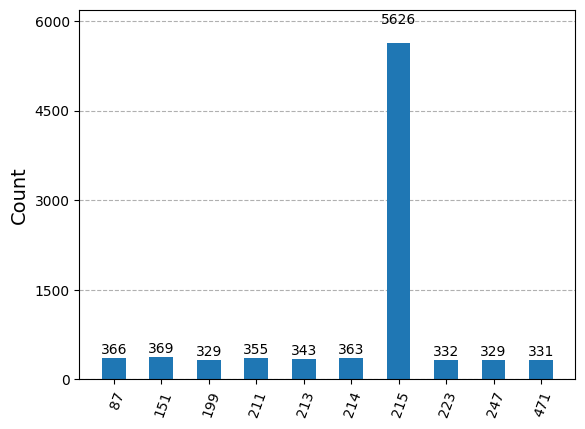

In [24]:
threshold = int(0.01 * n_shots) # the threshold of plotting significant measurements, 1% of the default number of shots, 1024
filteredAnswer = {k: v for k,v in results.items() if v >= threshold} # filter the answer for better view of plots
removedCounts = np.sum([ v for k,v in results.items() if v < threshold ]) # number of counts removed 
plot_histogram(filteredAnswer)